In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import warnings

warnings.filterwarnings('ignore')


In [42]:
# Read our data into a dataframe
data = pd.read_csv('marks.csv')
data

,student id,marks
0,1,95
1,2,98
2,3,92
3,4,10000
4,5,91
5,6,89
6,7,90
7,8,2000
8,9,100
9,10,100


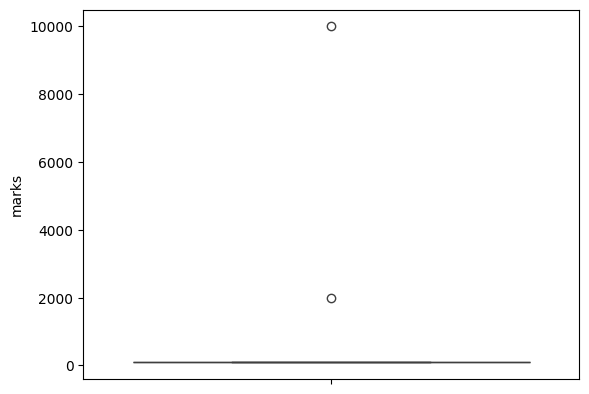

In [43]:

sns.boxplot(data["marks"])
plt.show()

In [46]:
# Define a model object with the Isolation Forest algorithm
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=96)

# Fit the data to the model
model.fit(data[['marks']])

# Display parameter values that were used
model.get_params()

{'bootstrap': False,
 'contamination': 0.2,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': 96,
 'verbose': 0,
 'warm_start': False}

In [47]:
# Add a column to the DF for scores from the model's decision_function
data['scores'] = model.decision_function(data[['marks']])

# Add a column to the DF for the anomaly flag from the model's predict function...-1 indicates anomaly
data['anomaly_score'] = model.predict(data[['marks']])

# Display the data with the columns added
data


,student id,marks,scores,anomaly_score
0,1,95,0.071516,1
1,2,98,0.062776,1
2,3,92,0.098088,1
3,4,10000,-0.317574,-1
4,5,91,0.105090,1
5,6,89,0.051859,1
6,7,90,0.096346,1
7,8,2000,-0.207437,-1
8,9,100,0.075809,1
9,10,100,0.075809,1


In [48]:
# Display just the anomalies
data[data['anomaly_score']==-1]

,student id,marks,scores,anomaly_score
3,4,10000,-0.317574,-1
7,8,2000,-0.207437,-1


In [49]:
anomaly_count = 2  # We already knew there were two anomalies in this data

accuracy = 100*list(data['anomaly_score']).count(-1)/(anomaly_count)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 100.0
